In this notebook the goal is to take an input image, perform ROI (Region Of Interest) detection. This is done using the Differentiable Binarization method.

In [15]:
# Import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [16]:
img_path = '/home/said/courses/Projetinfo/sports_scr/data/natation/000007.png'

In [17]:
# Create MSER object
mser = cv2.MSER_create()

# Your image path i-e receipt path
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
ref_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# detect regions in gray scale image
regions, _ = mser.detectRegions(img)

hulls = [cv2.convexHull(r) for r in regions]

#cv2.polylines(ref_img, hulls, 1, (0, 255, 0))

#cv2.imshow('img', ref_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [18]:
len(hulls)

5229

In [19]:
mask = np.zeros((img.shape[0], img.shape[1], 1), dtype=np.uint8)

for contour in hulls:
    cv2.drawContours(mask, [contour], -1, (255, 255, 255), -1)

# this is used to find only text regions, remaining are ignored
text_only = cv2.bitwise_and(img, img, mask=mask)

cv2.imshow("text only", text_only)
cv2.waitKey(0)
cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/said/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [20]:
text_only_0_1 = text_only.copy()
text_only_0_1[~(text_only_0_1 == 0)] = 1

In [21]:
text_only_0_1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

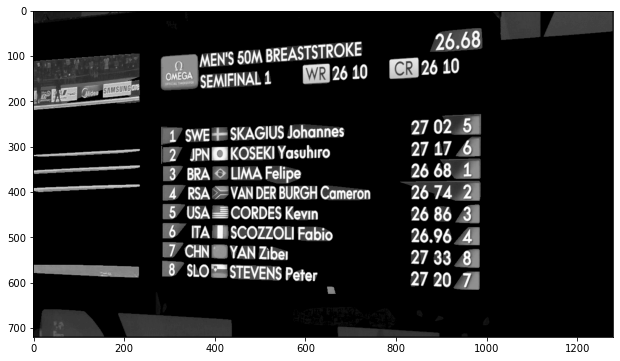

In [22]:
plt.figure(figsize=(12, 6))
plt.imshow(text_only, cmap='gray')

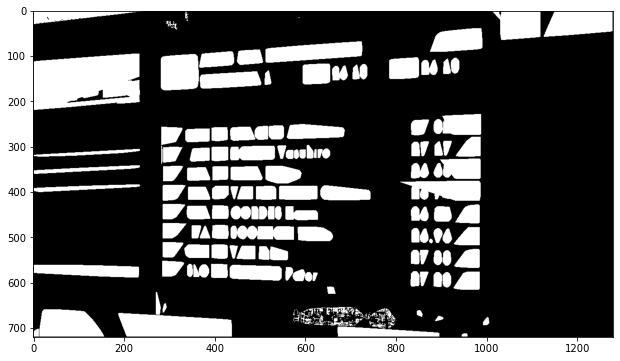

In [23]:
plt.figure(figsize=(12, 6))
plt.imshow(text_only_0_1, cmap='gray')

In [24]:
# Perform connected-component labeling
ret, labels = cv2.connectedComponents(text_only_0_1)


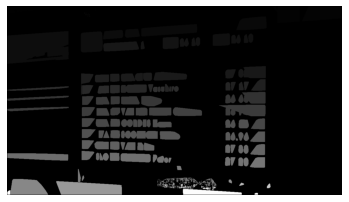

In [25]:
import matplotlib.pyplot as plt

# Plot the connected components using a color map
plt.imshow(labels, cmap='gray')
plt.axis('off')
plt.show()


In [26]:
# Draw rectangles around the regions
rectangles = []

for region in regions:
    x, y, w, h = cv2.boundingRect(region)
    rectangles.append([x, y, x + w, y + h])
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Display the image with the rectangles
cv2.imshow('Image with rectangles', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

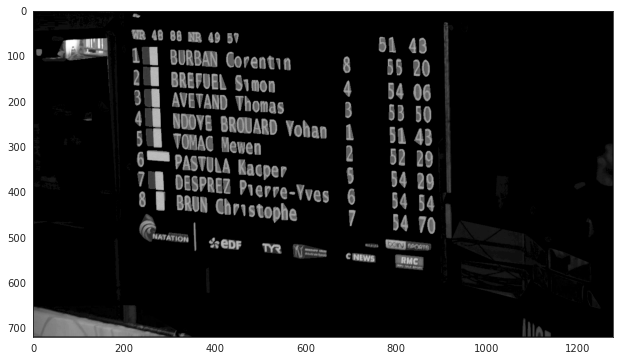

In [105]:
plt.figure(figsize=(12, 6))
plt.imshow(text_only, cmap='gray')

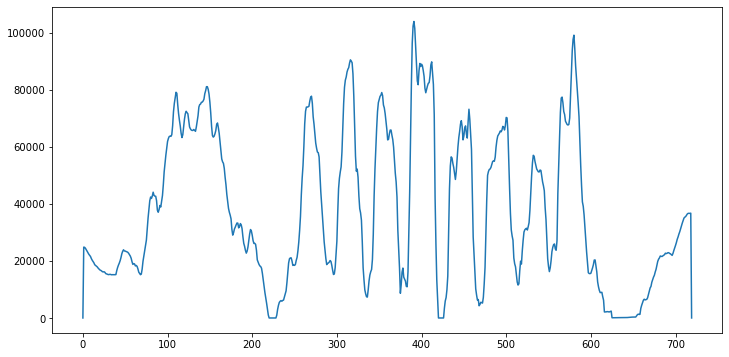

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(text_only.sum(axis=1))

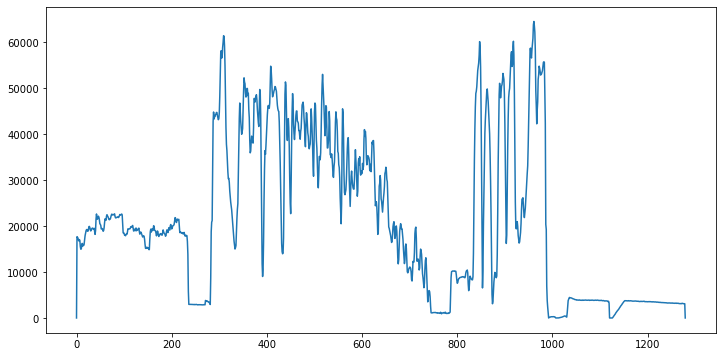

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(text_only.sum(axis=0))

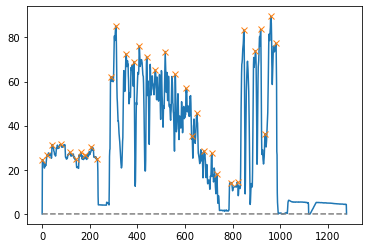

In [93]:
from scipy.signal import find_peaks
import numpy as np

x = text_only.mean(axis=0)
x_peaks, _ = find_peaks(x, height=int(0.1*max(x)), distance=20)
plt.plot(x)
plt.plot(x_peaks, x[x_peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [94]:
x_peaks

array([  1,  22,  42,  80, 118, 141, 162, 182, 207, 229, 288, 309, 352,
       385, 408, 439, 476, 517, 559, 605, 630, 650, 681, 713, 734, 794,
       821, 847, 896, 918, 938, 961, 982])

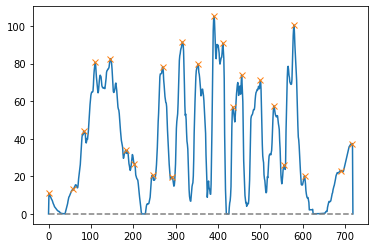

In [95]:
x = text_only[:, x_peaks[0]:x_peaks[-1]].mean(axis=1)
y_peaks, _ = find_peaks(x, height=int(0.1*max(x)), distance=20)
plt.plot(x)
plt.plot(y_peaks, x[y_peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

In [96]:
y_peaks

array([  1,  57,  83, 110, 146, 182, 203, 246, 270, 292, 316, 353, 391,
       412, 435, 456, 500, 532, 557, 580, 605, 692, 718])

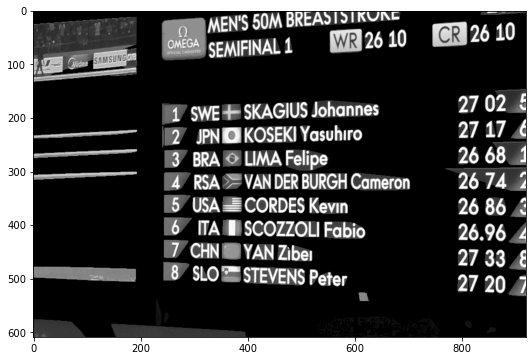

In [97]:
plt.figure(figsize=(12, 6))
plt.imshow(text_only[y_peaks[2]:y_peaks[-2],x_peaks[2]:x_peaks[-2]], cmap='gray')

In [29]:
# import the necessary packages
import numpy as np
# Malisiewicz et al.
def non_max_suppression_fast(boxes, overlapThresh):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []
	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")
	# initialize the list of picked indexes	
	pick = []
	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)
	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))
	# return only the bounding boxes that were picked using the
	# integer data type
	return boxes[pick].astype("int")

In [30]:
NMS_boxes = non_max_suppression_fast(boxes=np.array(rectangles), overlapThresh=0.1)

In [31]:
len(NMS_boxes)

166

In [32]:
len(rectangles)

5229

In [33]:
for box in NMS_boxes:
    x1, y1, x2, y2 = box
    cv2.rectangle(ref_img, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the image with the rectangles
cv2.imshow('Image with NMS boxes', ref_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

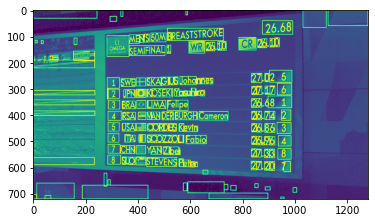

In [34]:
plt.imshow(ref_img)

In [3]:
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

In [9]:
mser = cv2.MSER_create()
coordinates, bboxes = mser.detectRegions(img)
for bbox in bboxes:
    x, y, w, h = bbox
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

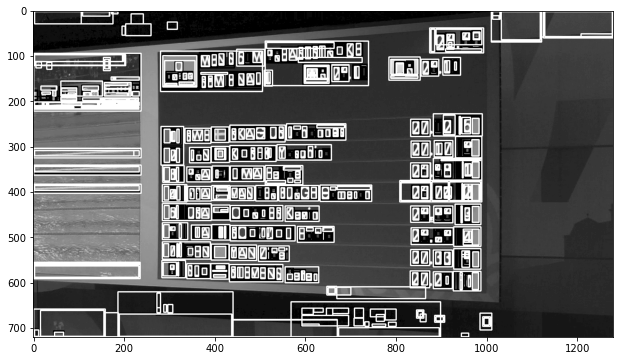

In [10]:
plt.figure(figsize=(12, 6))
plt.imshow(img, cmap='gray')

In [47]:
img_ = cv2.erode(text_only_0_1, np.ones((100, 100)))
img_ = cv2.dilate(img_, np.ones((100, 100)))

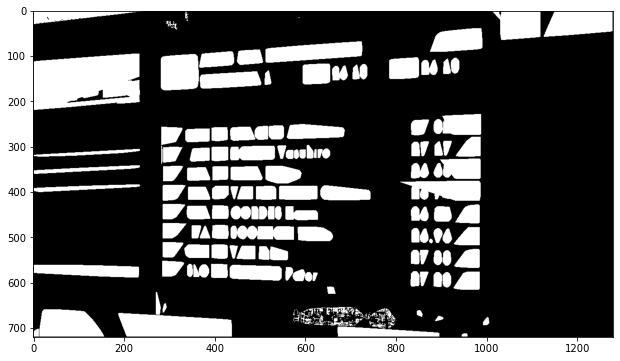

In [48]:
plt.figure(figsize=(12, 6))
plt.imshow(text_only_0_1, cmap='gray')